In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_df_target_removed = train_df.drop(columns=['credit'])

df = pd.concat([train_df_target_removed, test_df], axis=0)
print(train_df.shape, test_df.shape, df.shape)

(26457, 20) (10000, 19) (36457, 19)


In [4]:
train = train_df

In [8]:
train.loc[(train['family_size'] - train['child_num'] <= 2) & (train['child_num'] <= 2), :].shape
# child가 현재 같이 살고 있는지 별거 중인지는 알 수 없음
# 따라서 사실상 두 변수의 관계는 없음

(26088, 20)

### Credit
- 확실한 비대칭 데이터

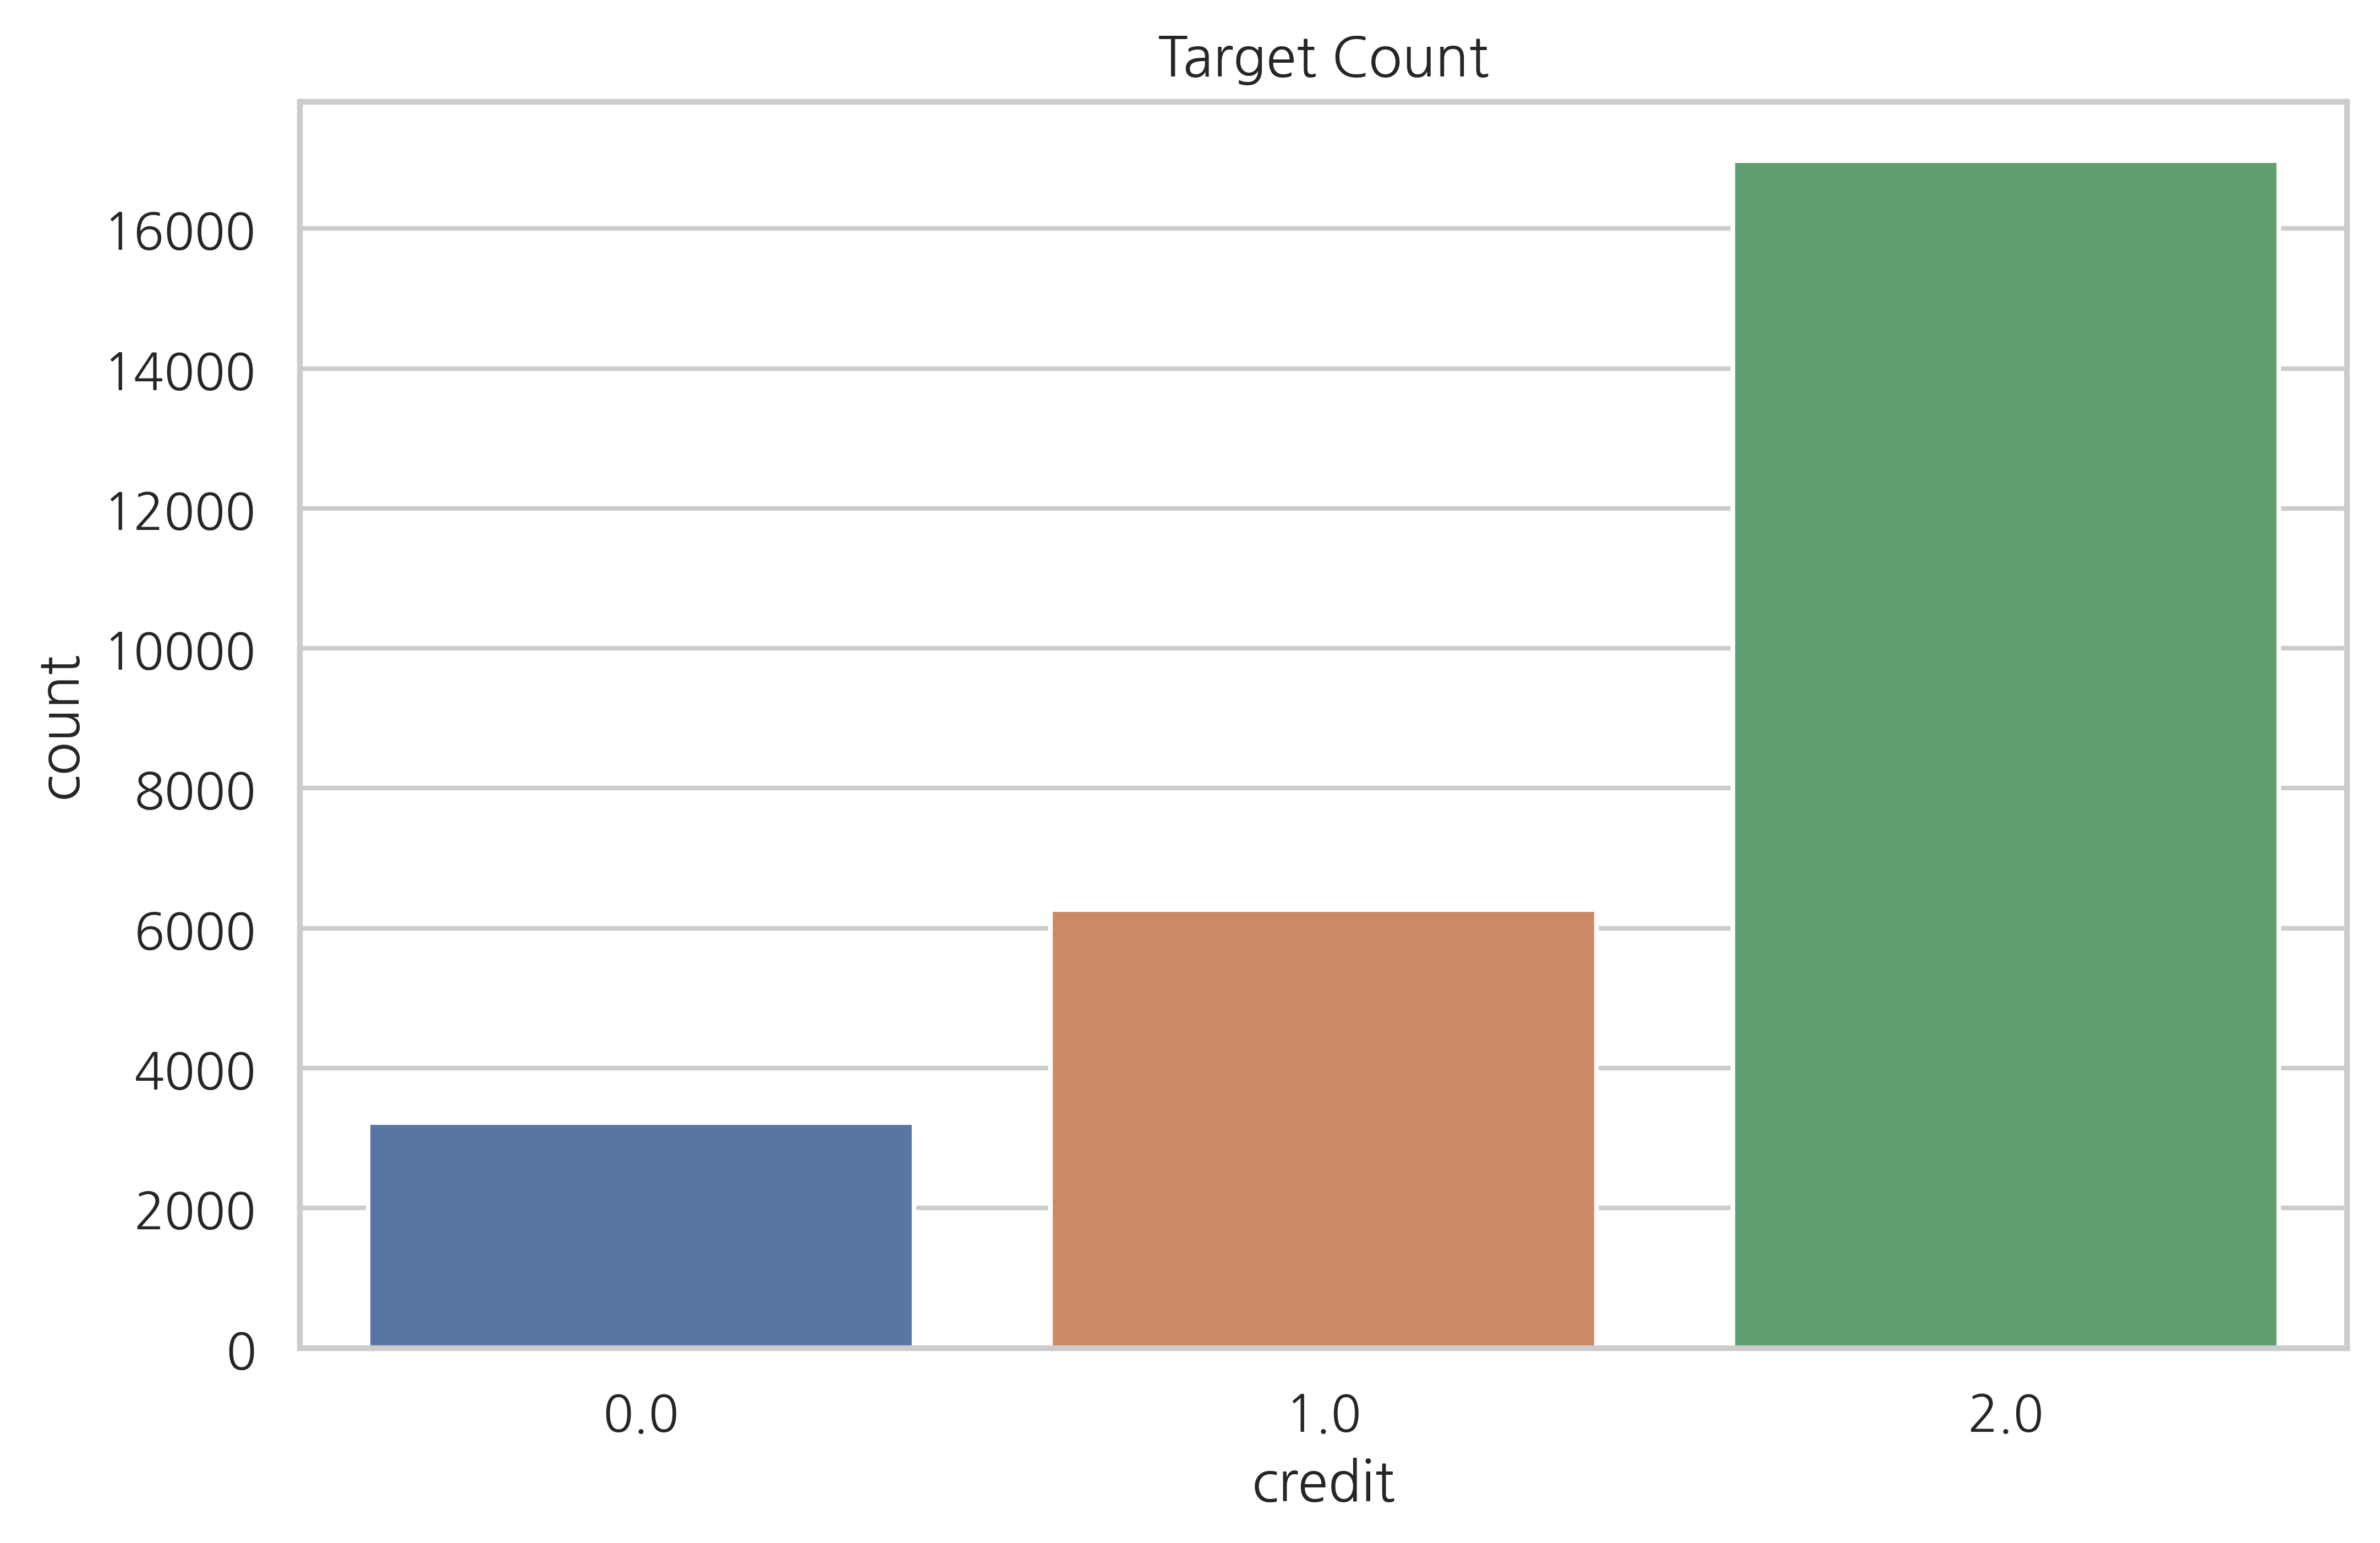

In [25]:
# train_df.groupby('credit').count()['index'].to_frame().plot(kind='bar')
# plt.legend('count')
# plt.show()

sns.countplot(train_df['credit'])
plt.title('Target Count')
plt.show()

### Begin_month
- 특정 기간 가입자가 폭증하는 현상을 보임
- 전체적으로는 최근 가입자가 경미하게 더 많은 추세

In [32]:
print('max value: ', df['begin_month'].max())
print('min value: ', df['begin_month'].min())

max value:  0.0
min value:  -60.0


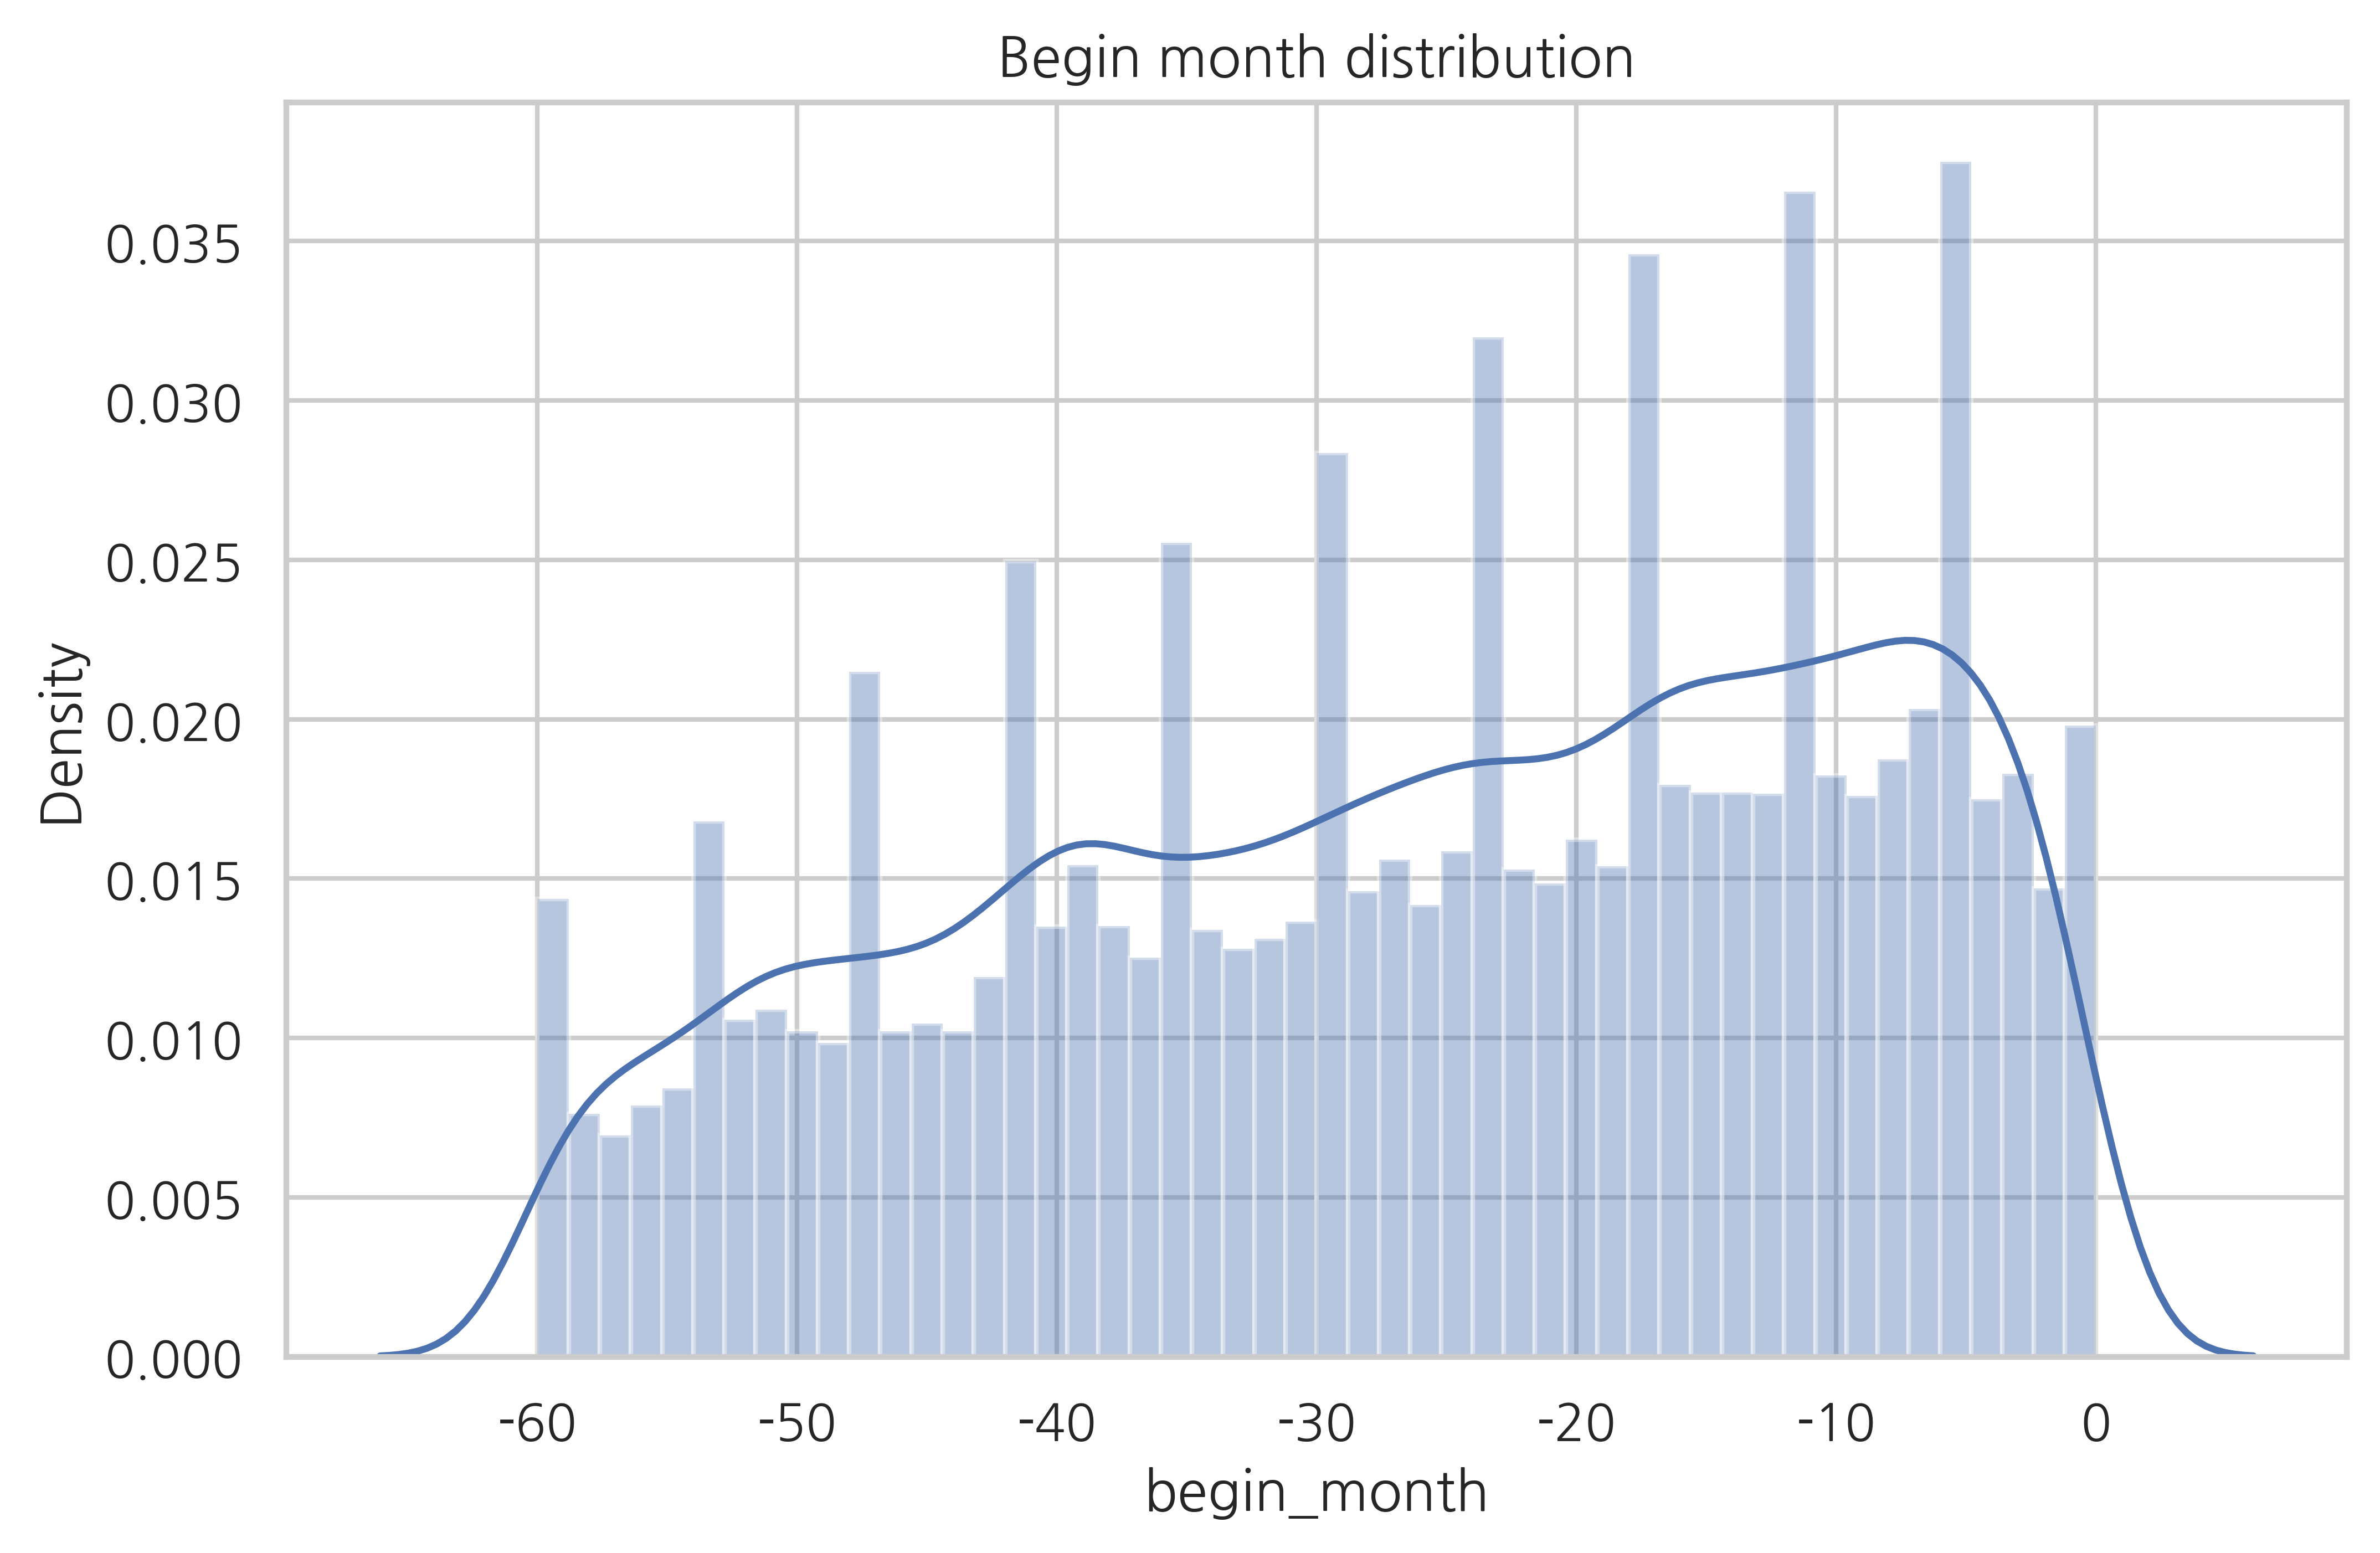

In [39]:
sns.distplot(df['begin_month'], bins=50)
plt.title('Begin month distribution')
plt.show()

In [130]:
train_df.groupby('credit').mean()['begin_month']

credit
0.0   -23.987896
1.0   -21.078826
2.0   -28.391914
Name: begin_month, dtype: float64

### Family_size
- 오히려 엄청 다인가구인 경우 신용등급이 좋음
- 아마 보호기관 단위로 등록한 듯

In [42]:
df['family_size'].unique()

array([ 2.,  3.,  4.,  1.,  5.,  6.,  7., 15., 20.,  9.])

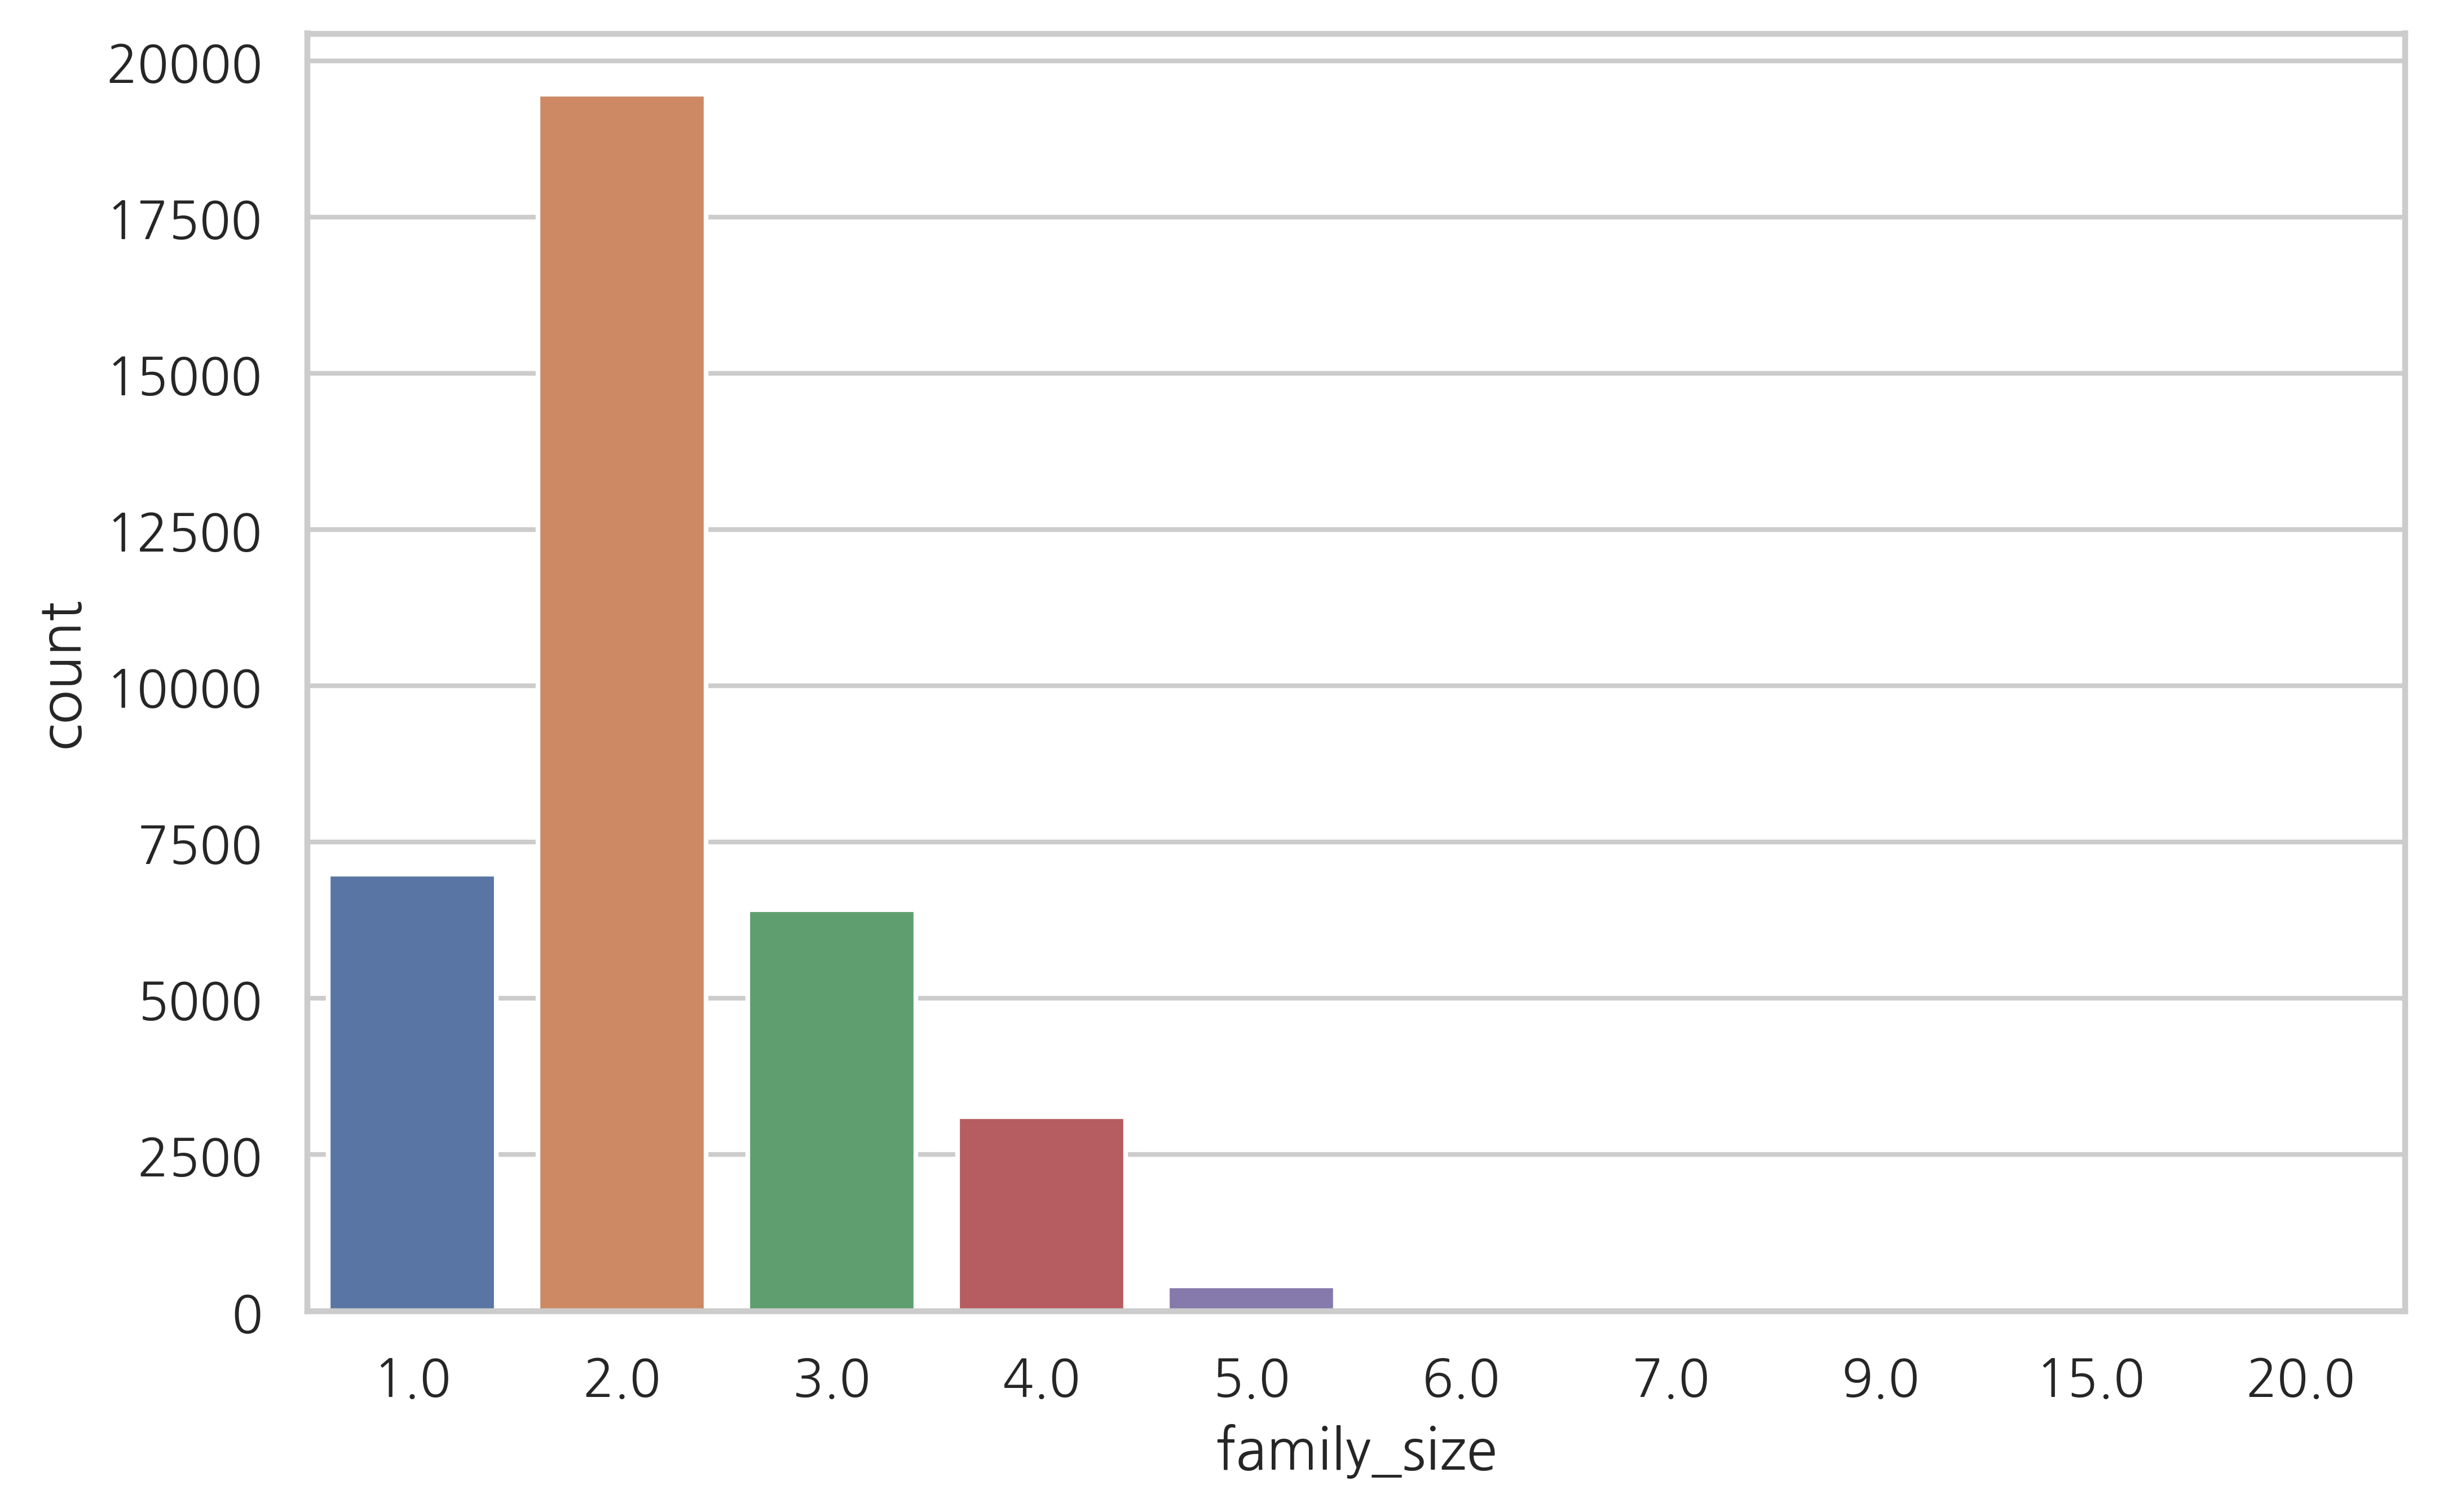

In [45]:
sns.countplot(df['family_size'])
plt.show()

In [59]:
fam = df.groupby('family_size').count()['index'].to_frame().sort_values(by=['index'], ascending=False)
fam
# round(fam / fam.sum(), 4)

,index
family_size,
2.0,19463
1.0,6987
3.0,6421
4.0,3106
5.0,397
6.0,58
7.0,19
15.0,3
9.0,2


### Occyp_type: 직업 유형

In [76]:
df['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='occyp_type'>

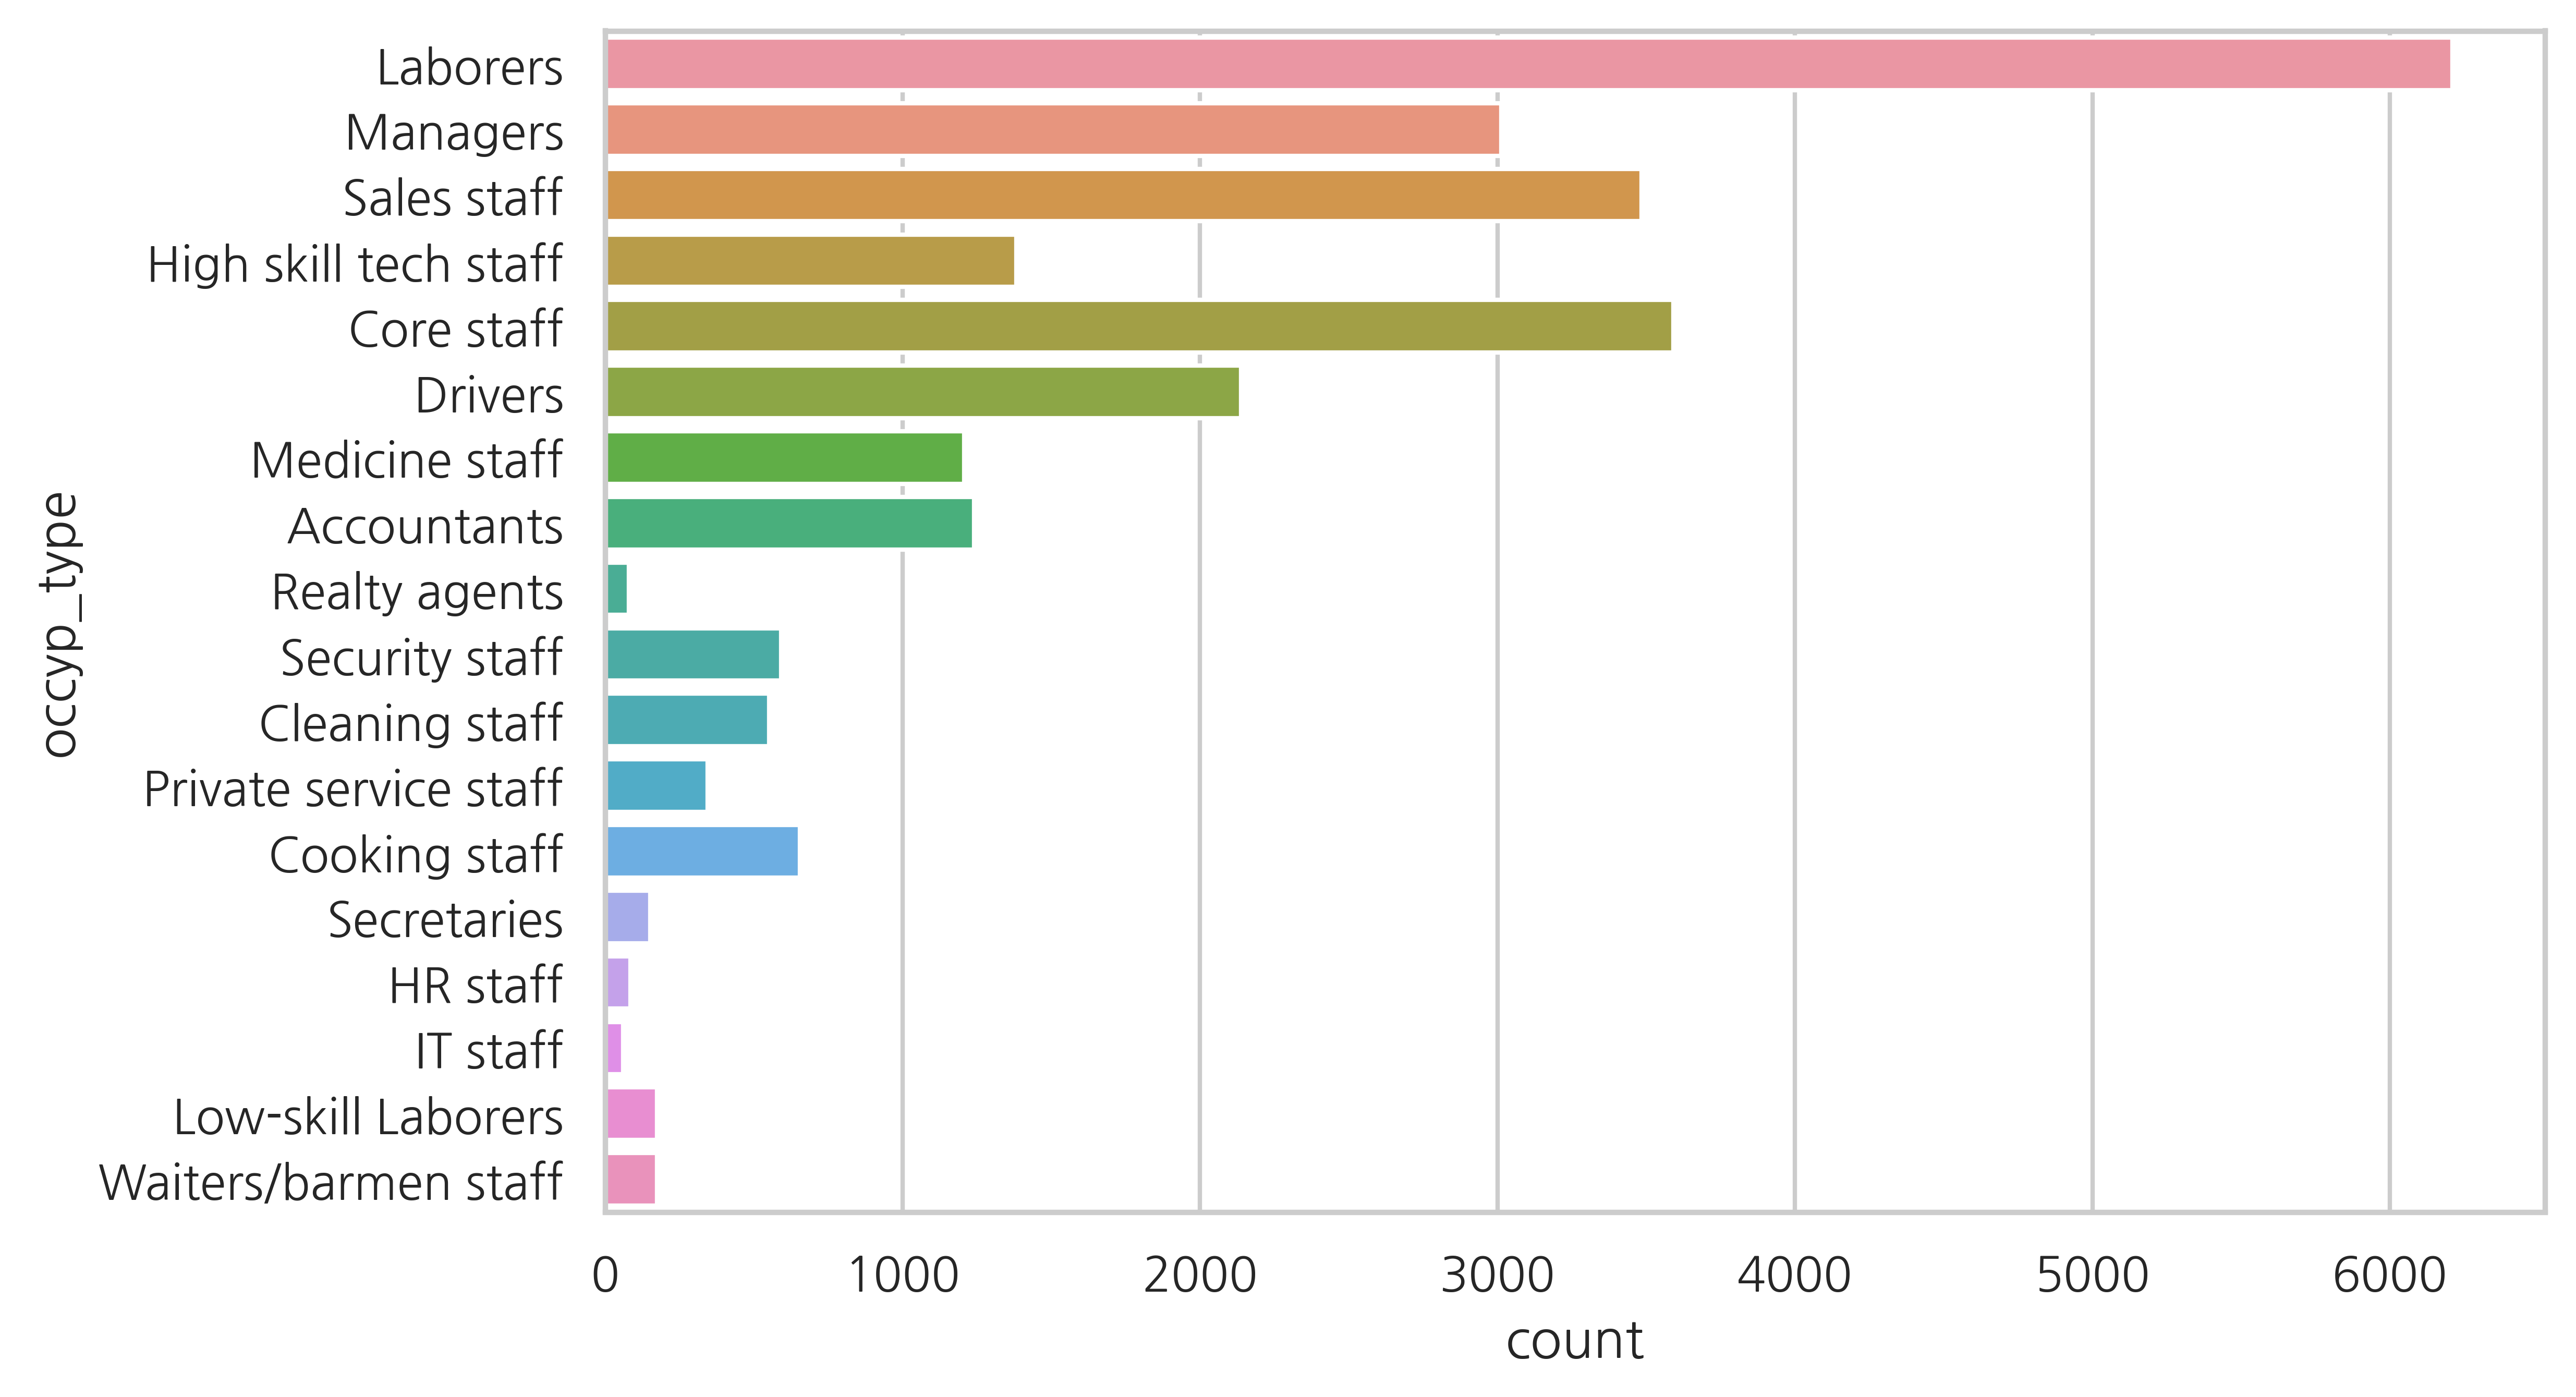

In [79]:
sns.countplot(y=df['occyp_type'])

### email
- 0이 이메일 소유, 1이 이메일 미소유?
- income total과 관계?

<AxesSubplot:xlabel='email', ylabel='count'>

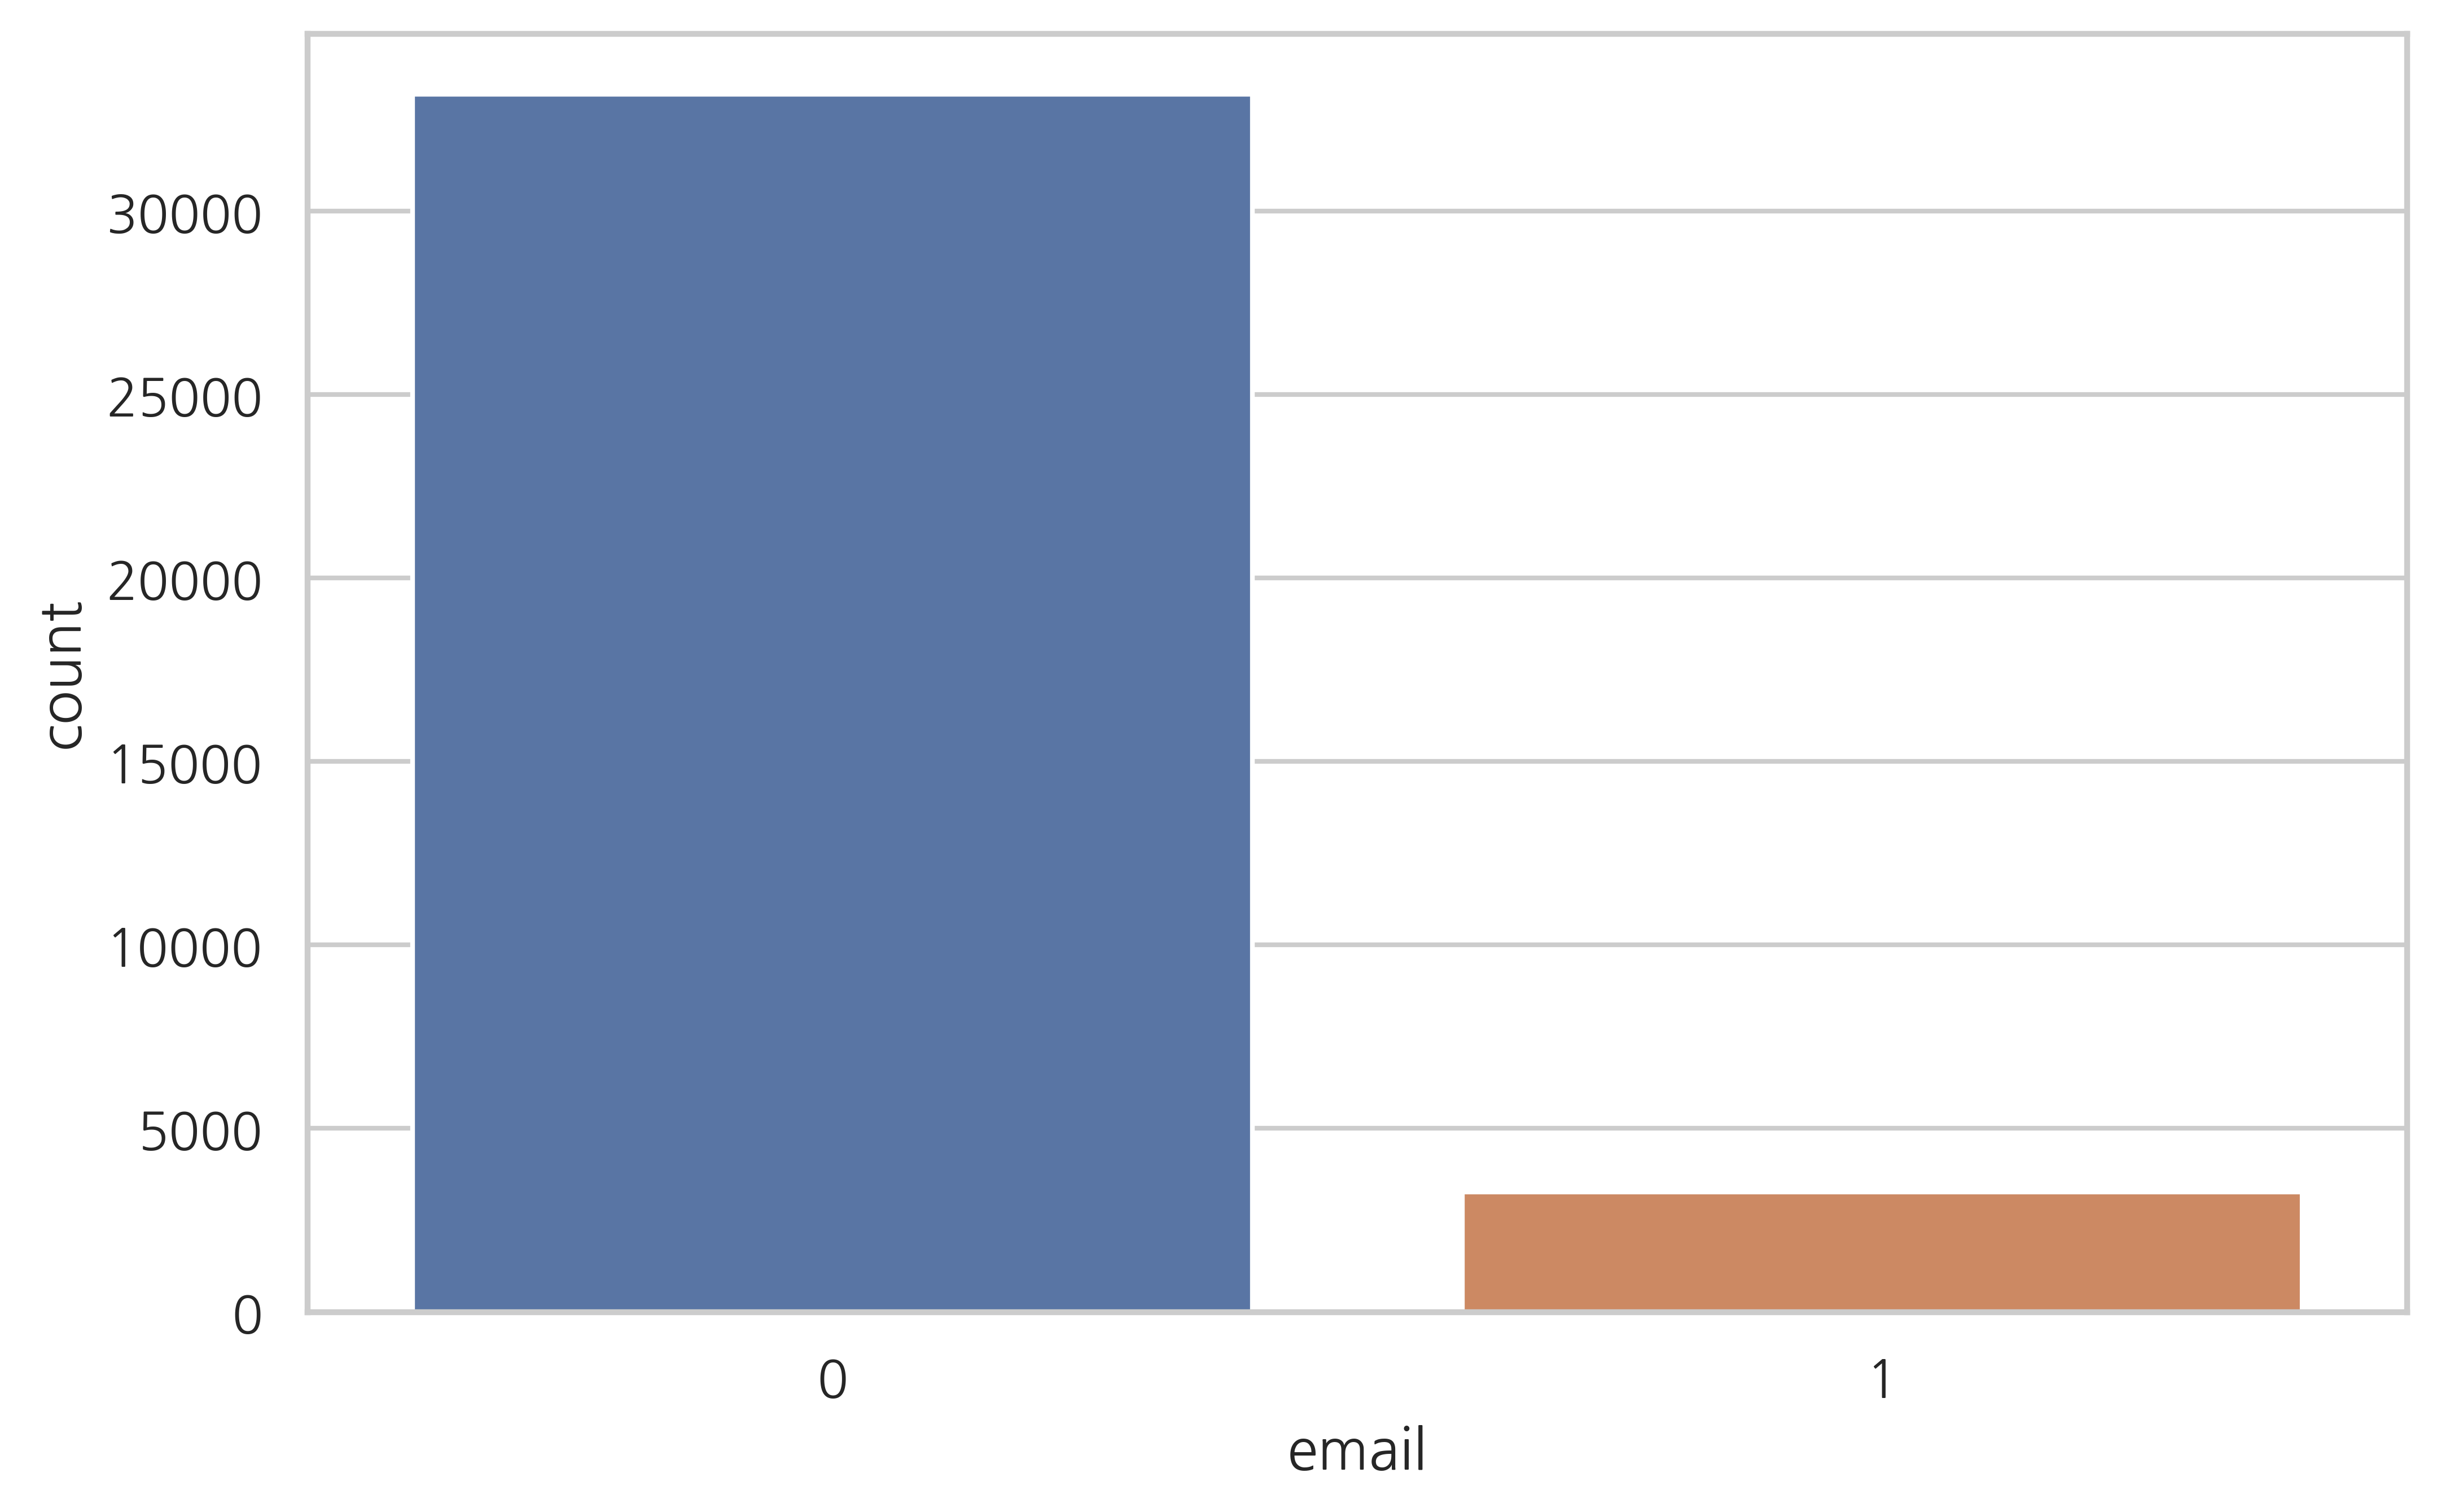

In [83]:
sns.countplot(df['email'])

In [86]:
train_df[train_df['email'] == 1].head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
7,7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14896,-5420,1,0,0,1,Drivers,2.0,-53.0,0.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0


### edu_type

In [92]:
len(df['edu_type'].unique())

5

<AxesSubplot:xlabel='count', ylabel='edu_type'>

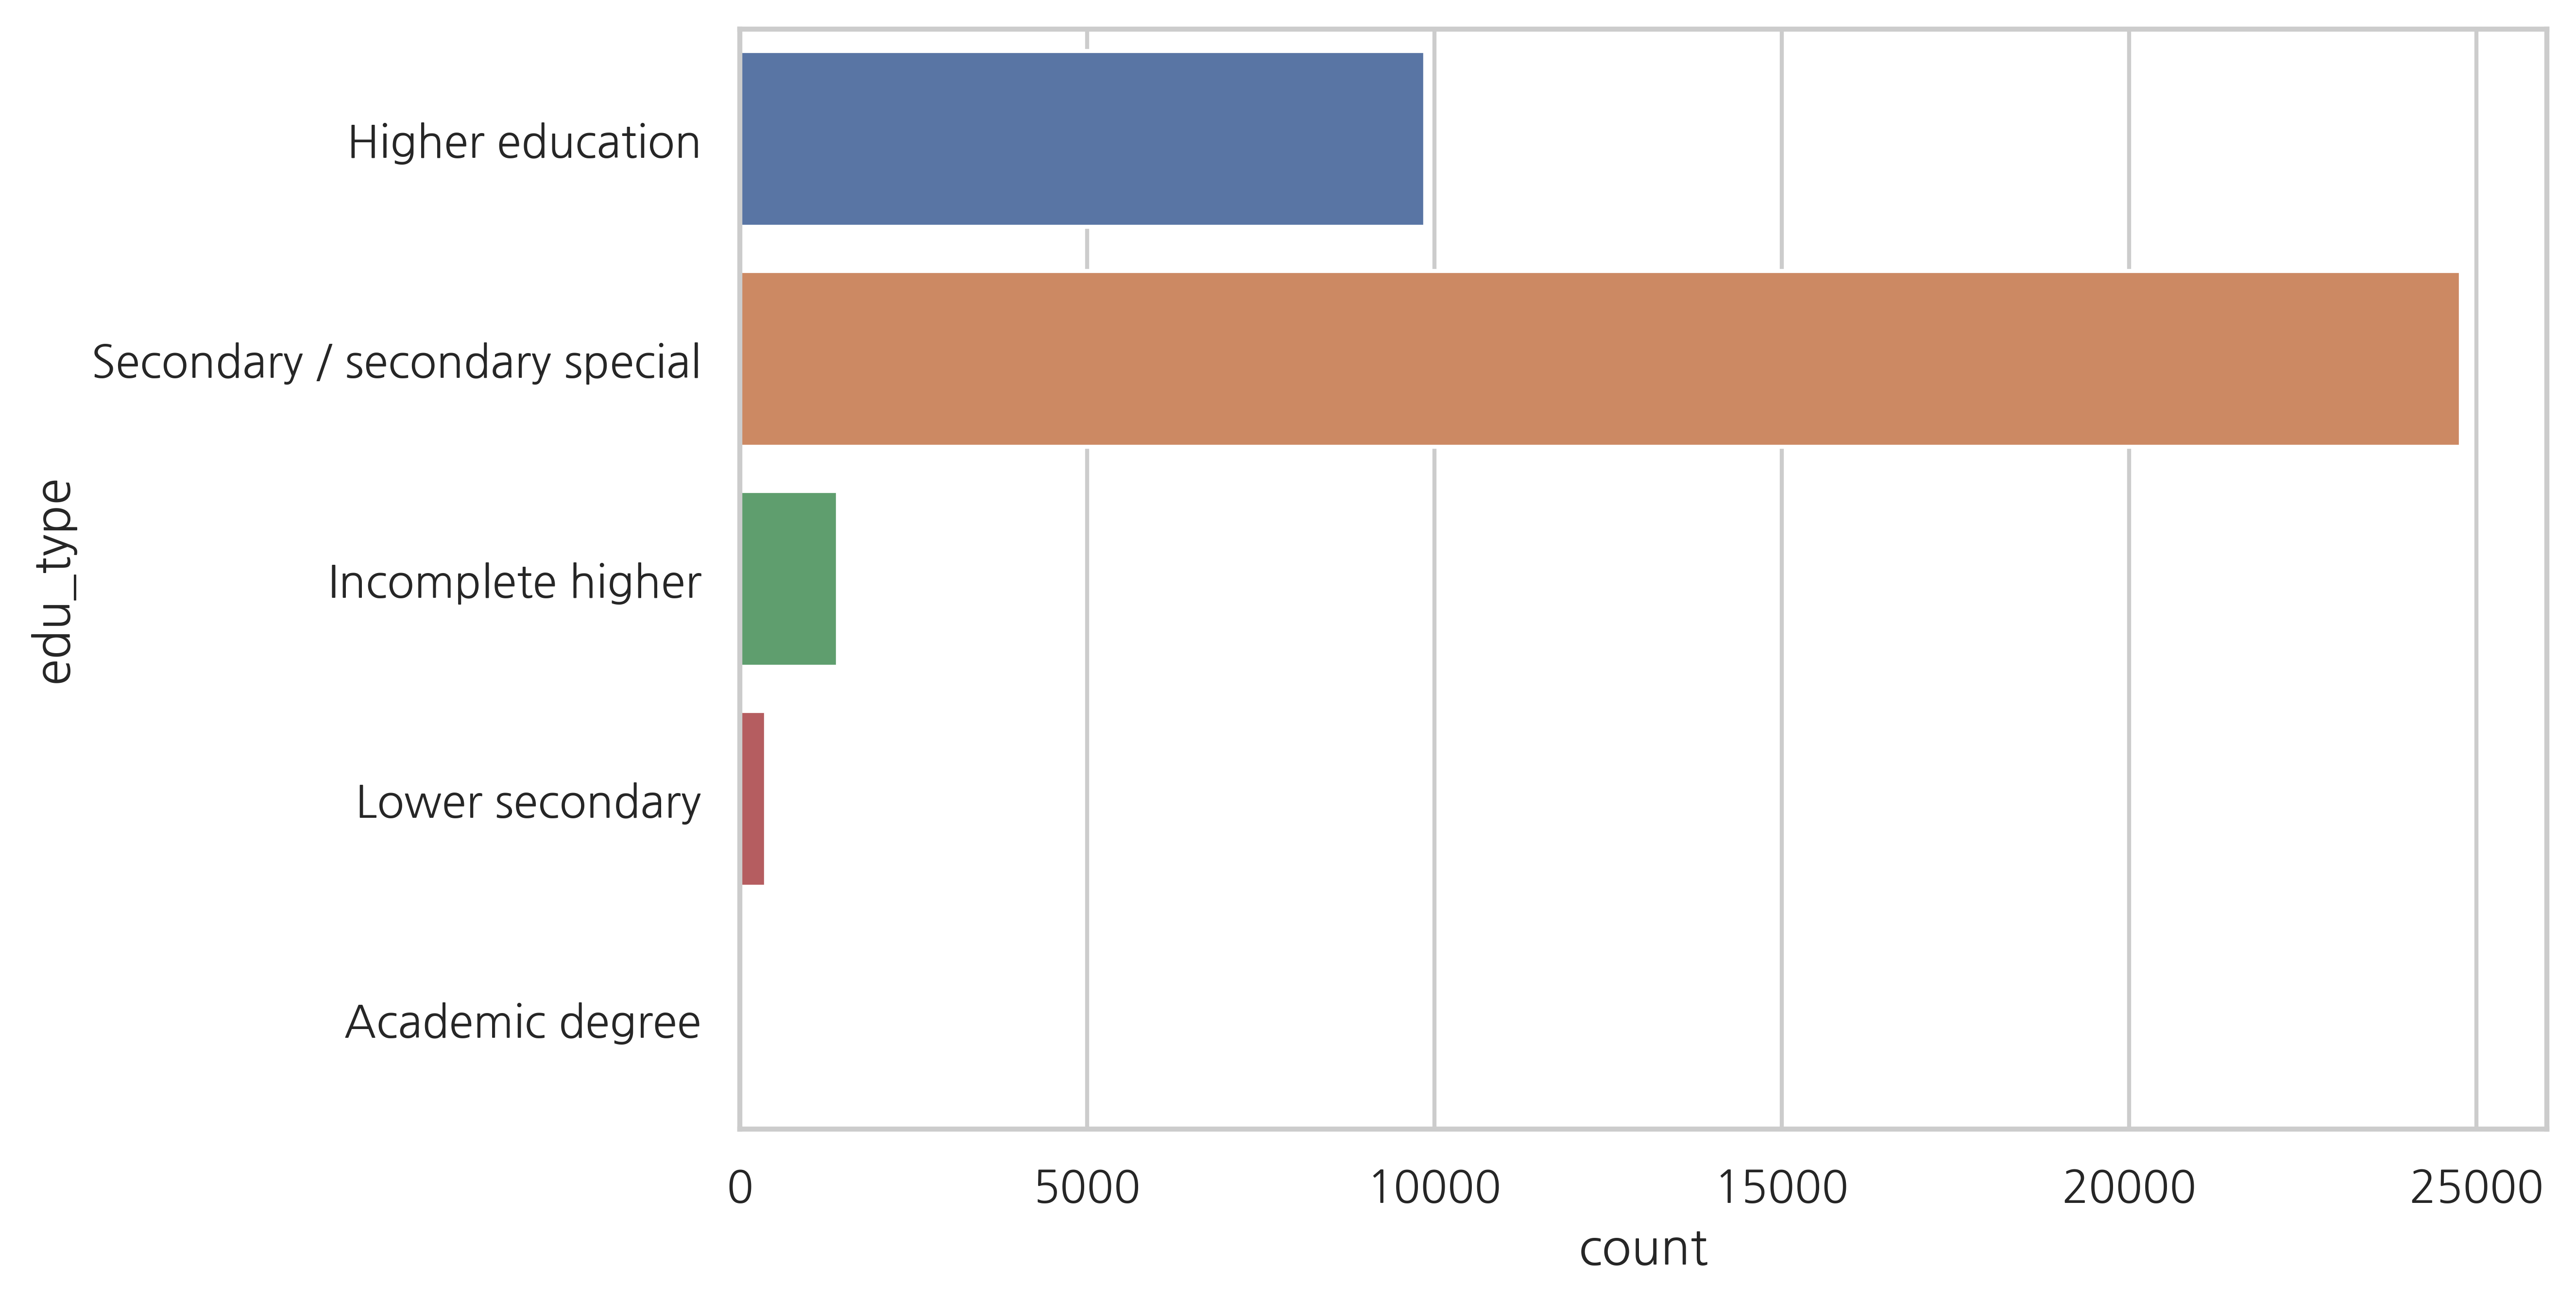

In [95]:
sns.countplot(y = df['edu_type'])